
**Student: Ilesingha I.T.S.**

**Student ID: IT21206078**





In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import acos, atan2, sqrt, degrees, radians
import math

# Define the Forward Kinematics Function
> Task 1 - Forward Kinematics



In [11]:
def forward_kinematics(L1, L2, L3, theta1, theta2, theta3):
    """
    Calculate the (x, y) position of the end effector using forward kinematics.

    Parameters:
    theta1, theta2, theta3 : Joint angles in radians
    L1, L2, L3 : Lengths of the links

    Returns:
    (x, y) : Position of the end effector in 2D space
    """
    # Convert angles to radians using numpy
    theta1 = np.radians(theta1)
    theta2 = np.radians(theta2)
    theta3 = np.radians(theta3)

    # Calculate the positions of each joint
    x1 = L1 * np.cos(theta1)
    y1 = L1 * np.sin(theta1)

    x2 = x1 + L2 * np.cos(theta1 + theta2)
    y2 = y1 + L2 * np.sin(theta1 + theta2)

    x3 = x2 + L3 * np.cos(theta1 + theta2 + theta3)
    y3 = y2 + L3 * np.sin(theta1 + theta2 + theta3)

    # Return the positions of each joint and the end effector
    return (0, 0), (x1, y1), (x2, y2), (x3, y3)

In [12]:
# Example usage for Tasks 1 to 4:
L1, L2, L3 = 5.0, 5.0, 5.0  # link lengths
theta1, theta2, theta3 = 30, 35, 40  # joint angles in degrees

In [13]:
joint_positions = forward_kinematics(L1, L2, L3, theta1, theta2, theta3)

In [14]:
def plot_robot_arm(joint_positions):
    # Unpack the joint positions
    x_vals = [pos[0] for pos in joint_positions]
    y_vals = [pos[1] for pos in joint_positions]

    plt.figure(figsize=(8, 8))
    plt.plot(x_vals, y_vals, 'o-', markersize=10, linewidth=3, markerfacecolor='red')
    plt.xlim(-sum([L1, L2, L3]), sum([L1, L2, L3]))
    plt.ylim(-sum([L1, L2, L3]), sum([L1, L2, L3]))
    plt.xlabel('X Position', fontsize=14)
    plt.ylabel('Y Position', fontsize=14)
    plt.title('Forward Kinematics', fontsize=16)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

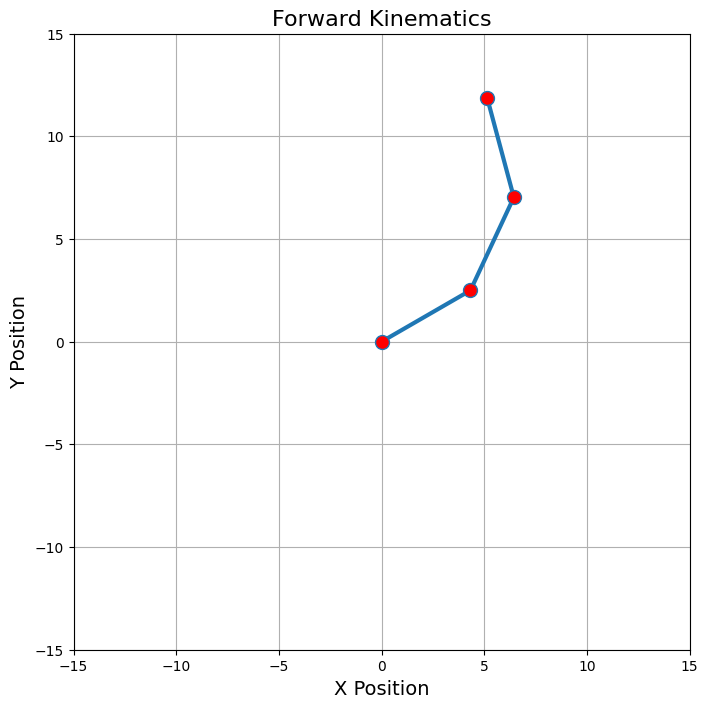

In [15]:
plot_robot_arm(joint_positions)

# Define the Inverse Kinematics Function


>   Task 2 - Inverse Kinematics



In [16]:
def inverse_kinematics(x, y, L1, L2, L3):
    """
    Calculate the joint angles (theta1, theta2, theta3) using inverse kinematics.

    Parameters:
    x, y : Desired position of the end effector in 2D space
    L1, L2, L3 : Lengths of the links

    Returns:
    theta1, theta2, theta3 : Joint angles in radians
    """
   # Compute wrist position
    r = np.sqrt(x**2 + y**2)
    cos_theta2 = (r**2 - L1**2 - L2**2) / (2 * L1 * L2)

    # Check for singularities or unreachable positions
    if np.abs(cos_theta2) > 1.0:
        raise ValueError("The position is unreachable.")

    # Elbow down solution (theta2)
    theta2_down = np.arccos(cos_theta2)
    theta2_up = -theta2_down

    # Compute theta1 for both elbow up and down
    k1 = L1 + L2 * np.cos(theta2_down)
    k2 = L2 * np.sin(theta2_down)
    theta1_down = np.arctan2(y, x) - np.arctan2(k2, k1)

    k1 = L1 + L2 * np.cos(theta2_up)
    k2 = L2 * np.sin(theta2_up)
    theta1_up = np.arctan2(y, x) - np.arctan2(k2, k1)

    # Compute theta3 for both solutions
    theta3_down = np.arctan2(y - L1 * np.sin(theta1_down) - L2 * np.sin(theta1_down + theta2_down),
                             x - L1 * np.cos(theta1_down) - L2 * np.cos(theta1_down + theta2_down)) - theta1_down - theta2_down

    theta3_up = np.arctan2(y - L1 * np.sin(theta1_up) - L2 * np.sin(theta1_up + theta2_up),
                           x - L1 * np.cos(theta1_up) - L2 * np.cos(theta1_up + theta2_up)) - theta1_up - theta2_up

    # Convert to degrees
    theta1_down, theta2_down, theta3_down = np.degrees([theta1_down, theta2_down, theta3_down])
    theta1_up, theta2_up, theta3_up = np.degrees([theta1_up, theta2_up, theta3_up])

    return (theta1_down, theta2_down, theta3_down), (theta1_up, theta2_up, theta3_up)


In [17]:
def plot_robot_arm(theta1, theta2, theta3, L1, L2, L3):
    # Convert angles to radians for plotting
    theta1 = np.radians(theta1)
    theta2 = np.radians(theta2)
    theta3 = np.radians(theta3)

    # Calculate the positions of each joint
    x1 = L1 * np.cos(theta1)
    y1 = L1 * np.sin(theta1)

    x2 = x1 + L2 * np.cos(theta1 + theta2)
    y2 = y1 + L2 * np.sin(theta1 + theta2)

    x3 = x2 + L3 * np.cos(theta1 + theta2 + theta3)
    y3 = y2 + L3 * np.sin(theta1 + theta2 + theta3)

    joint_positions = [(0, 0), (x1, y1), (x2, y2), (x3, y3)]

    # Plotting the robot arm
    x_vals = [pos[0] for pos in joint_positions]
    y_vals = [pos[1] for pos in joint_positions]

    plt.plot(x_vals, y_vals, '-o', markersize=10, linewidth=3, markerfacecolor='red')
    plt.xlim(-sum([L1, L2, L3]), sum([L1, L2, L3]))
    plt.ylim(-sum([L1, L2, L3]), sum([L1, L2, L3]))
    plt.xlabel('X Position', fontsize=14)
    plt.ylabel('Y Position', fontsize=14)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')

In [49]:
# Example usage for Tasks 1 to 4:
L1, L2, L3 = 1.0, 1.0, 1.0
x, y = 1.5, 1.0

In [50]:
try:
    solutions = inverse_kinematics(x, y, L1, L2, L3)
    print(f"Elbow Down Solution: θ1 = {solutions[0][0]:.2f}, θ2 = {solutions[0][1]:.2f}, θ3 = {solutions[0][2]:.2f}")
    print(f"Elbow Up Solution: θ1 = {solutions[1][0]:.2f}, θ2 = {solutions[1][1]:.2f}, θ3 = {solutions[1][2]:.2f}")

    # Plotting both solutions
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plot_robot_arm(*solutions[0], L1, L2, L3)
    plt.title('Elbow Down', fontsize=16)

    plt.subplot(1, 2, 2)
    plot_robot_arm(*solutions[1], L1, L2, L3)
    plt.title('Elbow Up', fontsize=16)

    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(e)

The position is unreachable.


# Visualization Function


> Task 3 - Simulation and Visualization



In [51]:
def plot_robot(theta1, theta2, theta3, L1, L2, L3):
    """
    Plot the robot arm configuration given the joint angles.

    Parameters:
    theta1, theta2, theta3 : Joint angles in radians
    L1, L2, L3 : Lengths of the links
    """
    # Convert angles from degrees to radians
    theta1 = np.radians(theta1)
    theta2 = np.radians(theta2)
    theta3 = np.radians(theta3)

    # Calculate joint positions
    x0, y0 = 0, 0  # Base of the robot
    x1, y1 = L1 * np.cos(theta1), L1 * np.sin(theta1)
    x2, y2 = x1 + L2 * np.cos(theta1 + theta2), y1 + L2 * np.sin(theta1 + theta2)
    x3, y3 = x2 + L3 * np.cos(theta1 + theta2 + theta3), y2 + L3 * np.sin(theta1 + theta2 + theta3)

    # Plot the robot arm with the preferred visual style
    plt.figure(figsize=(8, 8))
    plt.plot([x0, x1, x2, x3], [y0, y1, y2, y3], '-o', linewidth=3, markersize=10, markerfacecolor='red')
    plt.xlim(-sum([L1, L2, L3]), sum([L1, L2, L3]))
    plt.ylim(-sum([L1, L2, L3]), sum([L1, L2, L3]))
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.title('3-Link Robot Arm', fontsize=16)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')  # Keep the aspect ratio equal
    plt.show()

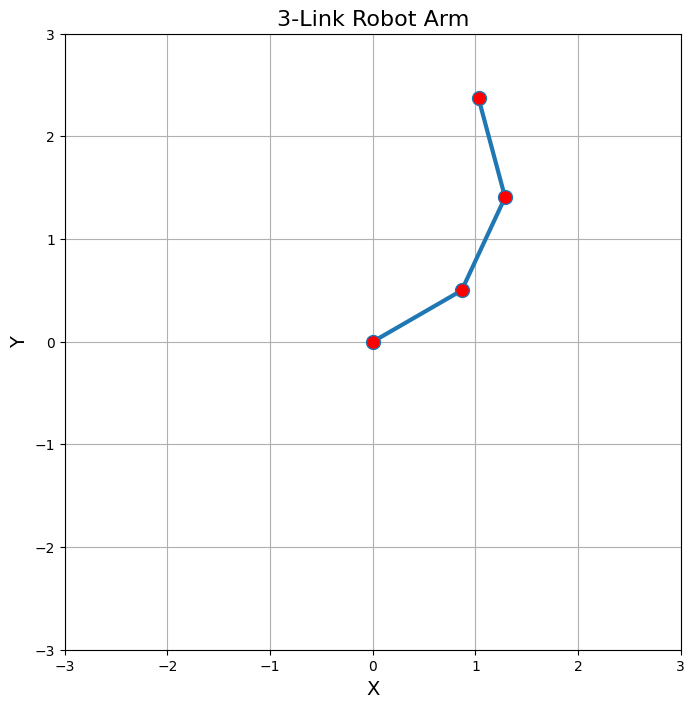

In [52]:
# Task 3: Simulation and Visualization
plot_robot(theta1, theta2, theta3, L1, L2, L3)

# Path Planning Challenge


> Task 4 - Path Planning Challenge



In [53]:
def forward_kinematics(theta1, theta2, theta3, L1, L2, L3):
    """
    Calculate the positions of the joints in the robot arm based on the joint angles.

    Parameters:
    theta1, theta2, theta3 : Joint angles in radians
    L1, L2, L3 : Lengths of the robot arm segments

    Returns:
    (x1, y1), (x2, y2), (x3, y3) : Positions of the joints and end effector
    """
    # Position of the first joint
    x1 = L1 * math.cos(theta1)
    y1 = L1 * math.sin(theta1)

    # Position of the second joint
    x2 = x1 + L2 * math.cos(theta1 + theta2)
    y2 = y1 + L2 * math.sin(theta1 + theta2)

    # Position of the end effector (third joint)
    x3 = x2 + L3 * math.cos(theta1 + theta2 + theta3)
    y3 = y2 + L3 * math.sin(theta1 + theta2 + theta3)

    return (x1, y1), (x2, y2), (x3, y3)

In [54]:
def simulate_robot_movement_with_obstacles(L1, L2, L3, start, end, obstacles, steps=100):
    """
    Simulate the robot arm movement from the start position to the end position while avoiding obstacles.

    Parameters:
    L1, L2, L3 : Lengths of the robot arm segments
    start : Starting position of the end effector (x, y)
    end : Target position of the end effector (x, y)
    obstacles : List of obstacle positions [(x1, y1), (x2, y2), ...]
    steps : Number of steps for the path

    Returns:
    None : This function displays an animated plot of the robot arm movement.
    """
    # Linear interpolation between start and end points
    x_path = np.linspace(start[0], end[0], steps)
    y_path = np.linspace(start[1], end[1], steps)

    # Combine x and y coordinates into a path list
    path = [(x, y) for x, y in zip(x_path, y_path)]

    # Initialize plot
    plt.figure(figsize=(8, 8))

    # Loop through each point in the path
    for i, (px, py) in enumerate(path):
        # Obstacle avoidance check
        for obs in obstacles:
            # If the point is too close to an obstacle, adjust the path slightly
            if np.linalg.norm(np.array((px, py)) - np.array(obs)) < 0.5:
                px += 0.5  # Adjust x coordinate
                py += 0.5  # Adjust y coordinate

        # Calculate angles for each joint using inverse kinematics
        r = math.sqrt(px**2 + py**2)

        # If the target is unreachable, print a message and skip this point
        if r > L1 + L2:
            print(f"Point ({px:.2f}, {py:.2f}) is unreachable.")
            continue

        # Calculate the angle for the second joint (theta2)
        D = (px**2 + py**2 - L1**2 - L2**2) / (2 * L1 * L2)
        D = np.clip(D, -1.0, 1.0)  # Ensure D is within the valid range [-1, 1]
        theta2 = math.atan2(math.sqrt(1 - D**2), D)

        # Calculate the angle for the first joint (theta1)
        theta1 = math.atan2(py, px) - math.atan2(L2 * math.sin(theta2), L1 + L2 * math.cos(theta2))

        # Angle for the third joint (theta3) is assumed to be 0 in this 2D planar example
        theta3 = 0

        # Get joint positions using forward kinematics
        joint1, joint2, end_effector = forward_kinematics(theta1, theta2, theta3, L1, L2, L3)

        # Plot the robot arm with the calculated joint positions
        plt.figure(figsize=(8, 8))
        plt.plot([0, joint1[0], joint2[0], end_effector[0]],
                 [0, joint1[1], joint2[1], end_effector[1]], '-o',
                 linewidth=3, markersize=10, markerfacecolor='red')
        plt.xlim(-sum([L1, L2, L3]), sum([L1, L2, L3]))
        plt.ylim(-sum([L1, L2, L3]), sum([L1, L2, L3]))
        plt.xlabel('X', fontsize=14)
        plt.ylabel('Y', fontsize=14)
        plt.title(f"Robot Arm Path Planning (Step {i+1}/{steps})")
        plt.grid(True)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.scatter(*zip(*obstacles), color='black', s=100, label="Obstacles" if i == 0 else "")

        # Mark the start and end points
        if i == 0:
            plt.scatter(start[0], start[1], color='green', s=100, label="Start")
        if i == steps - 1:
            plt.scatter(end[0], end[1], color='blue', s=100, label="End")

        plt.pause(0.1)  # Pause for animation effect
        plt.cla()  # Clear the axes for the next frame

    plt.show()

In [ ]:
# Example start and end points
start = (0, 0)
end = (2, 2)

# Define some obstacles
obstacles = [(1, 1), (1.5, 1.5)]

# Lengths of robot arm segments
L1 = 1
L2 = 1
L3 = 0.5

# Simulate the robot arm movement with obstacles
simulate_robot_movement_with_obstacles(L1, L2, L3, start, end, obstacles)

In [58]:
def simulate_robot_movement_with_obstacles(L1, L2, L3, start, end, obstacles, steps=100):
    '''
    Simulate the robot arm movement from the start position to the end position while avoiding obstacles.

    Parameters:
    L1, L2, L3 : Lengths of the robot arm segments
    start : Starting position of the end effector (x, y)
    end : Target position of the end effector (x, y)
    obstacles : List of obstacle positions [(x1, y1), (x2, y2), ...]
    steps : Number of steps for the path

    Returns:
    None : This function displays an animated plot of the robot arm movement.
    '''
    # Linear interpolation between start and end points
    x_path = np.linspace(start[0], end[0], steps)
    y_path = np.linspace(start[1], end[1], steps)

    # Combine x and y coordinates into a path list
    path = [(x, y) for x, y in zip(x_path, y_path)]

    # Initialize plot
    plt.figure(figsize=(8, 8))

    # Plot the obstacles
    plt.scatter(*zip(*obstacles), color='black', s=100, label="Obstacles")

    # Plot start and end points
    plt.scatter(start[0], start[1], color='green', s=100, label="Start")
    plt.scatter(end[0], end[1], color='blue', s=100, label="End")

    # Loop through each point in the path
    for i, (px, py) in enumerate(path):
        try:
            # Calculate angles for each joint using inverse kinematics
            theta1, theta2, theta3 = inverse_kinematics(px, py, L1, L2, L3)

            # Get joint positions using forward kinematics
            joint1, joint2, end_effector = forward_kinematics(theta1, theta2, theta3, L1, L2, L3)

            # Plot the robot arm with the calculated joint positions
            plt.plot([0, joint1[0], joint2[0], end_effector[0]],
                     [0, joint1[1], joint2[1], end_effector[1]], '-o',
                     linewidth=3, markersize=10, markerfacecolor='red')

            # Set the x and y limits based on the sum of the segment lengths
            plt.xlim(-sum([L1, L2, L3]), sum([L1, L2, L3]))
            plt.ylim(-sum([L1, L2, L3]), sum([L1, L2, L3]))

            # Add labels and title
            plt.xlabel('X', fontsize=14)
            plt.ylabel('Y', fontsize=14)
            plt.title(f"Robot Arm Path Planning (Step {i+1}/{steps})")

            # Display grid and maintain equal aspect ratio
            plt.grid(True)
            plt.gca().set_aspect('equal', adjustable='box')

            plt.pause(0.1)  # Pause for animation effect

            # Clear the axes for the next frame, but not too early
            plt.cla()

            # Replot the obstacles and start/end points
            plt.scatter(*zip(*obstacles), color='black', s=100, label="Obstacles")
            plt.scatter(start[0], start[1], color='green', s=100, label="Start")
            plt.scatter(end[0], end[1], color='blue', s=100, label="End")

        except ValueError as e:
            print(f"Point ({px:.2f}, {py:.2f}) is unreachable. Error: {e}")

    plt.legend()
    plt.show()

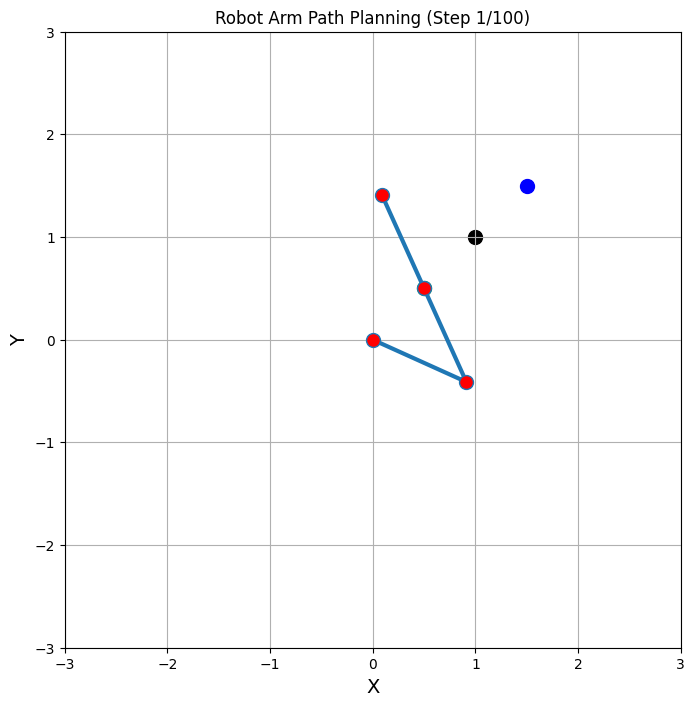

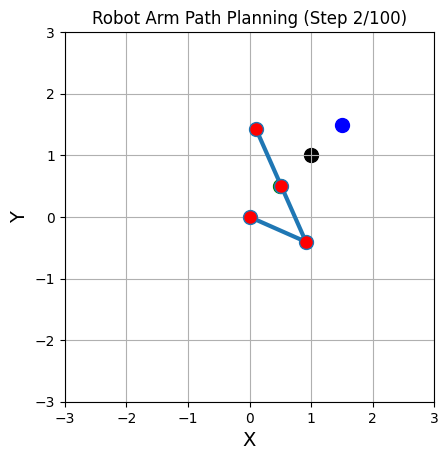

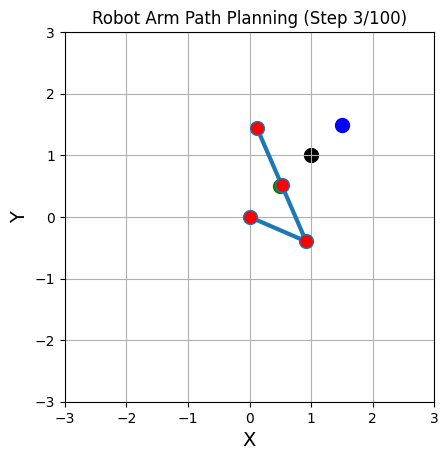

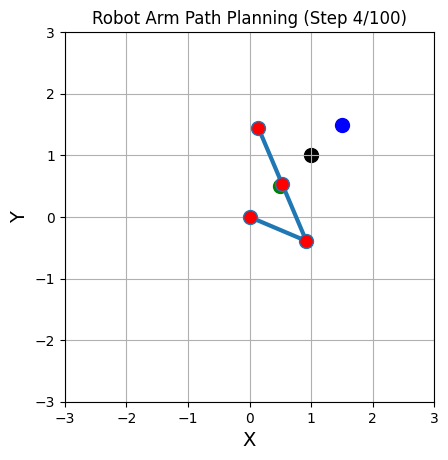

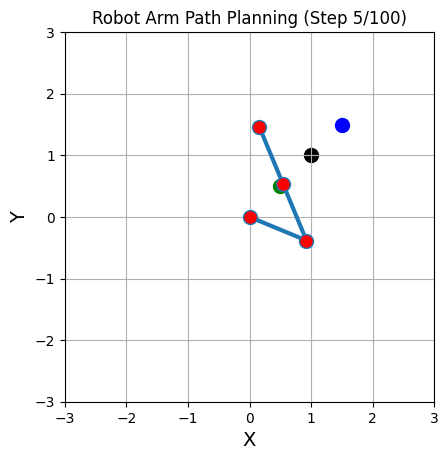

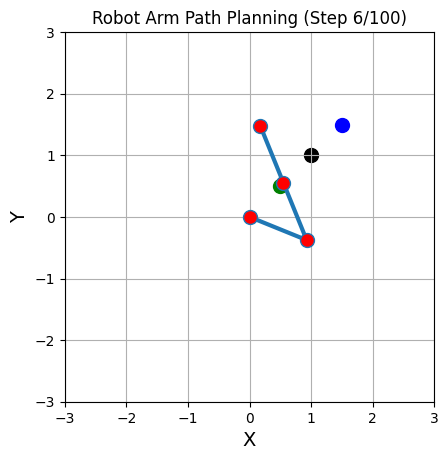

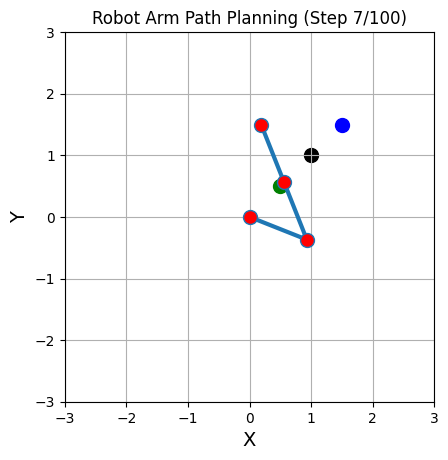

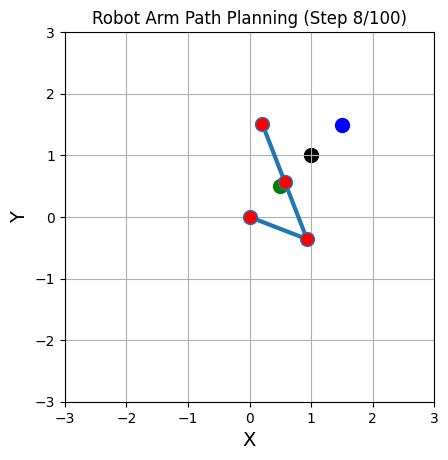

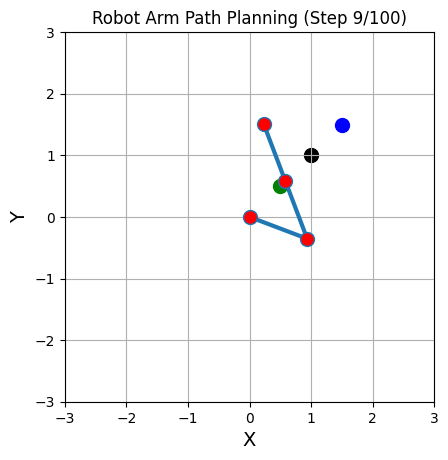

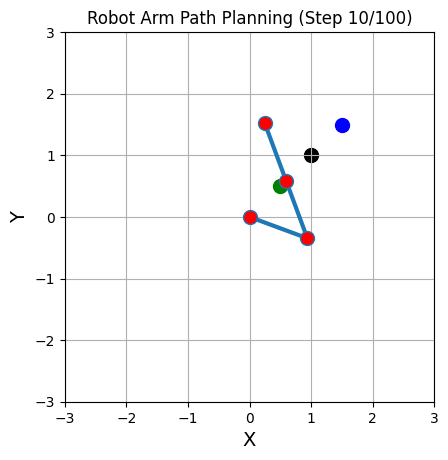

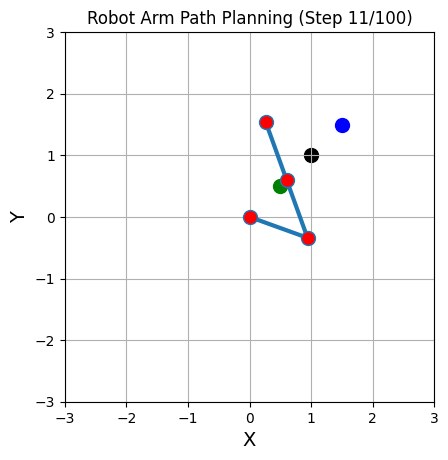

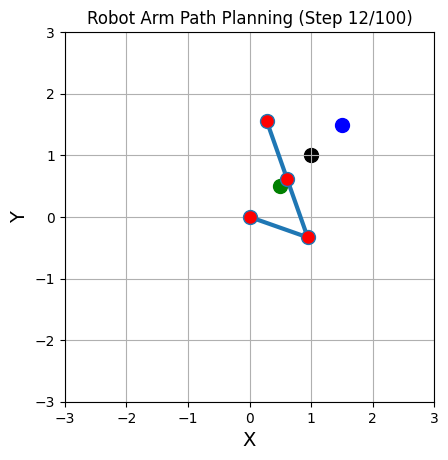

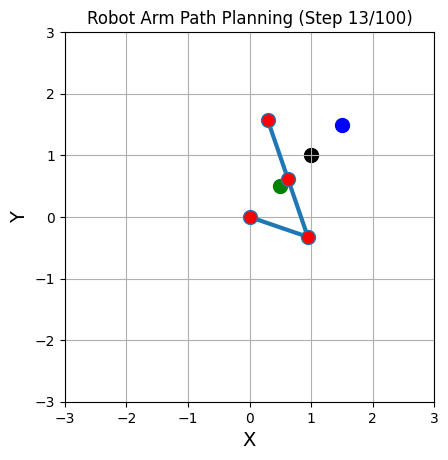

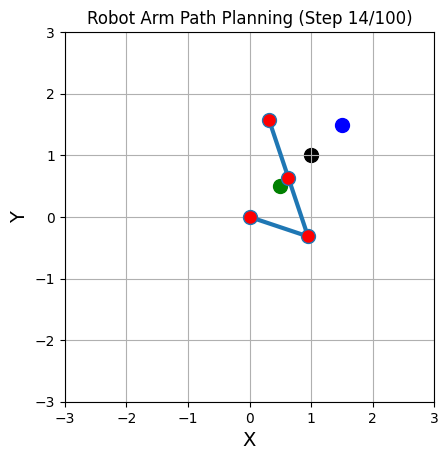

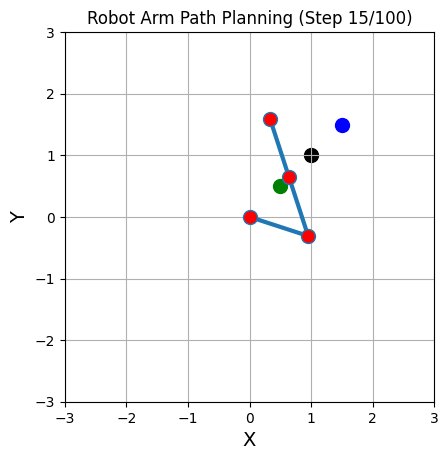

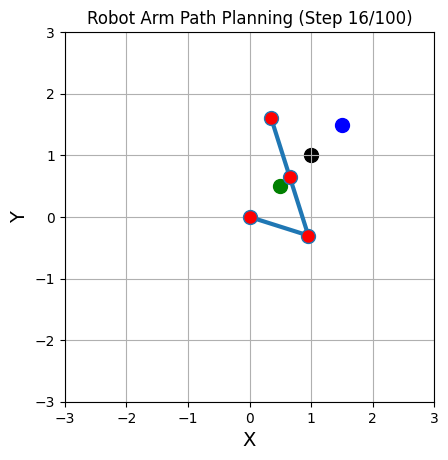

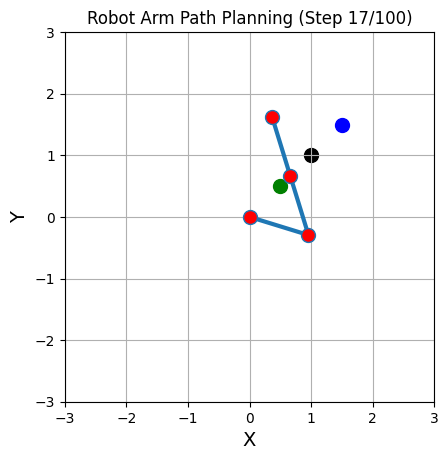

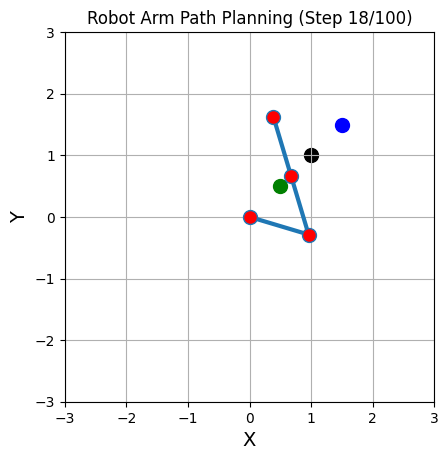

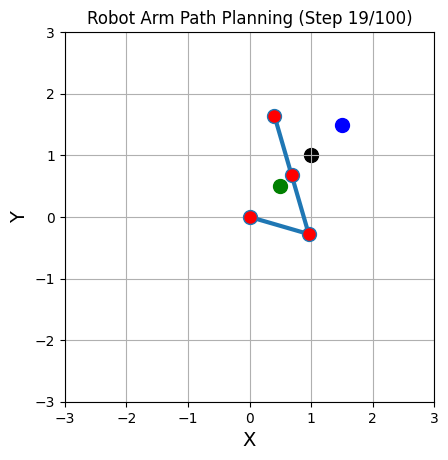

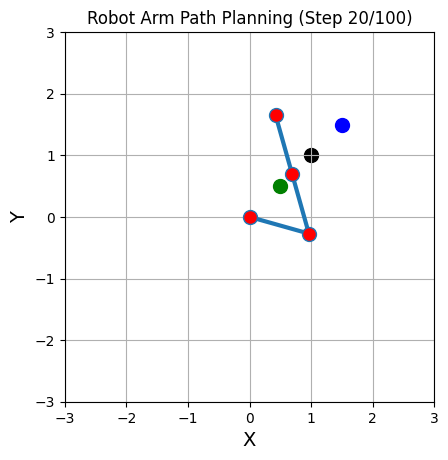

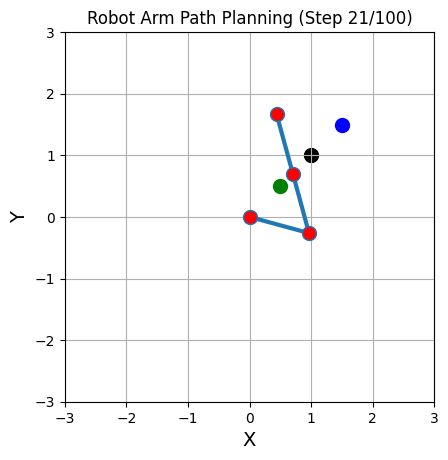

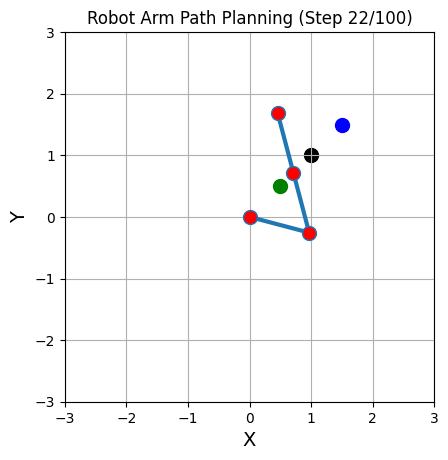

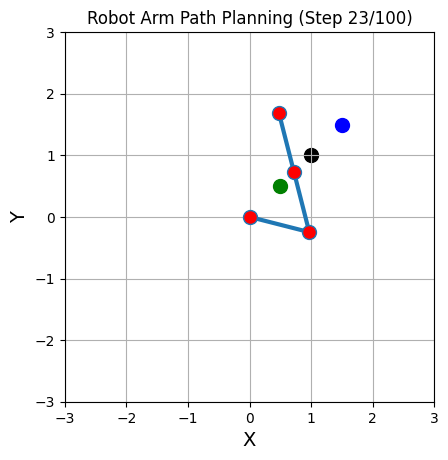

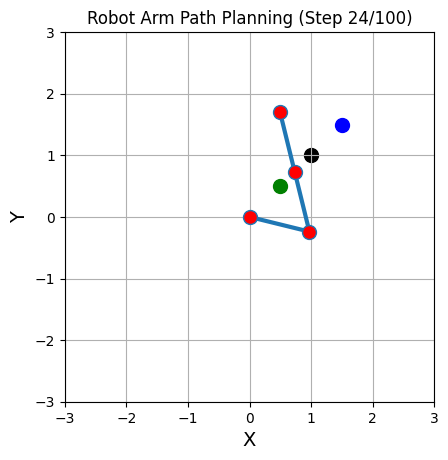

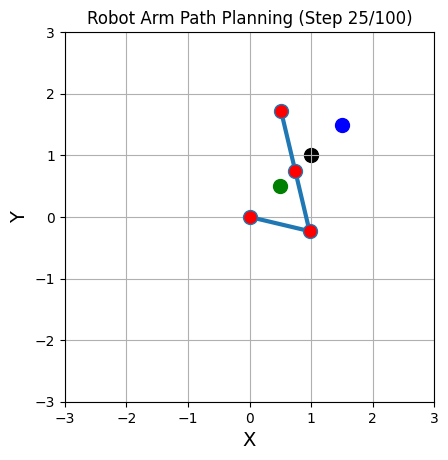

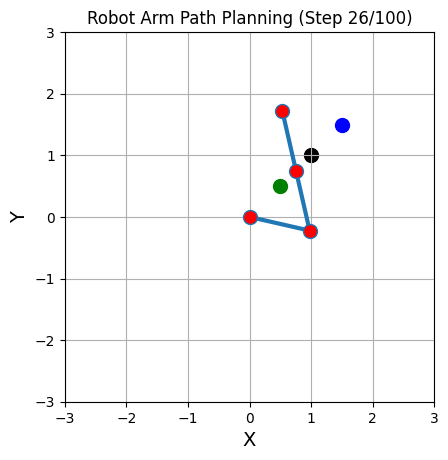

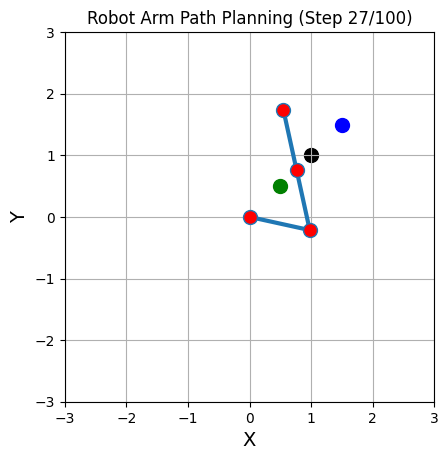

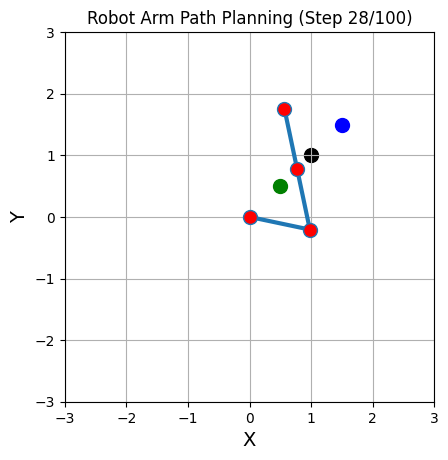

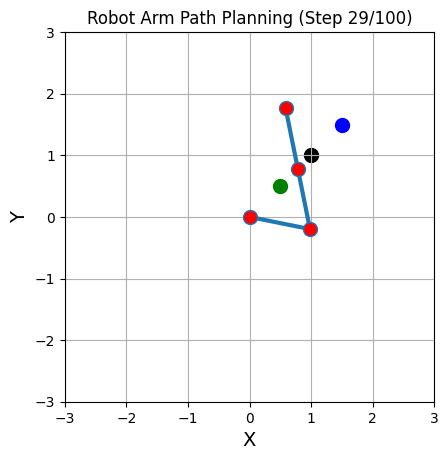

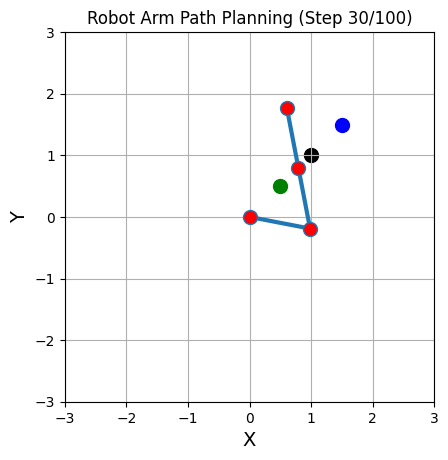

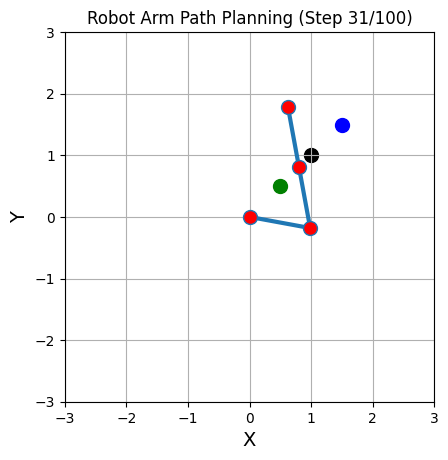

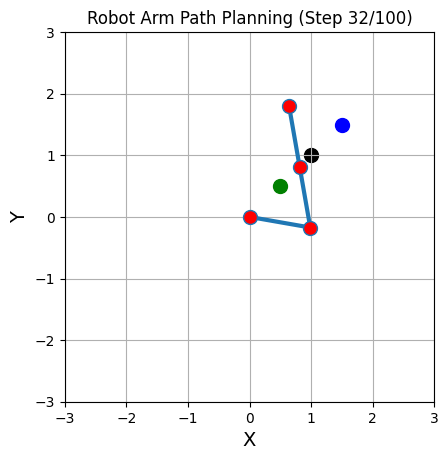

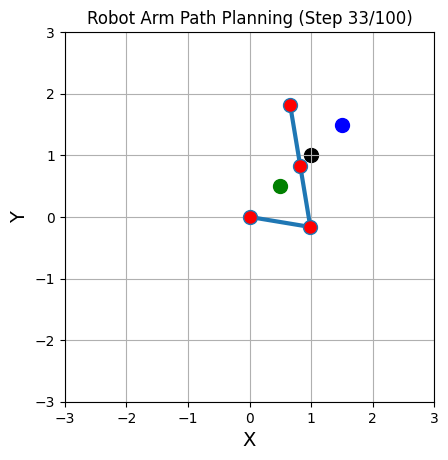

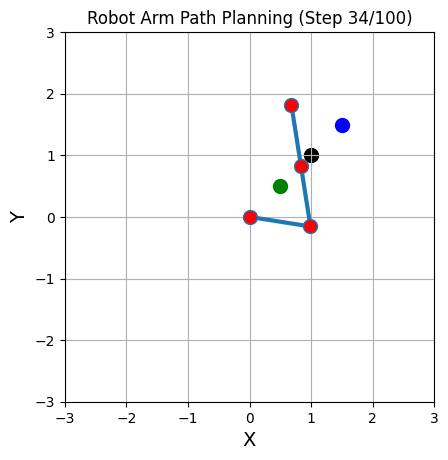

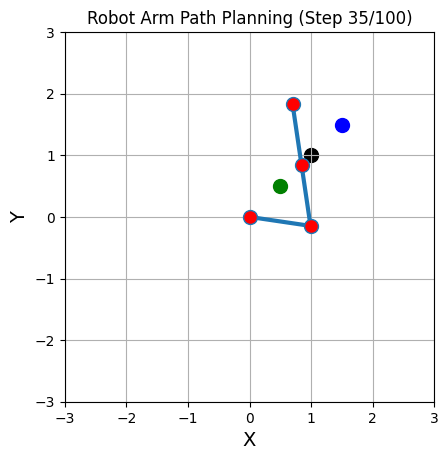

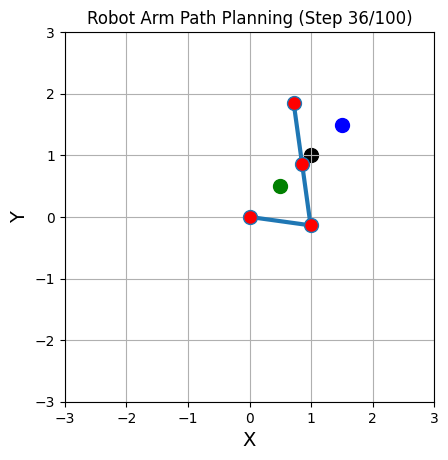

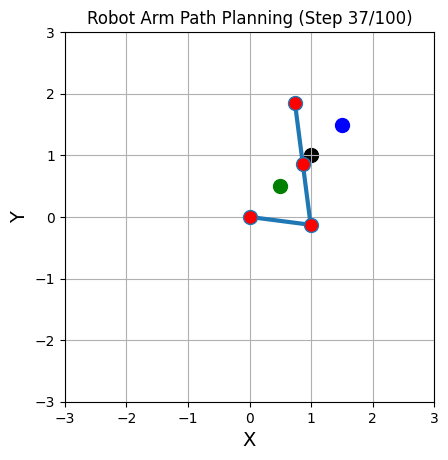

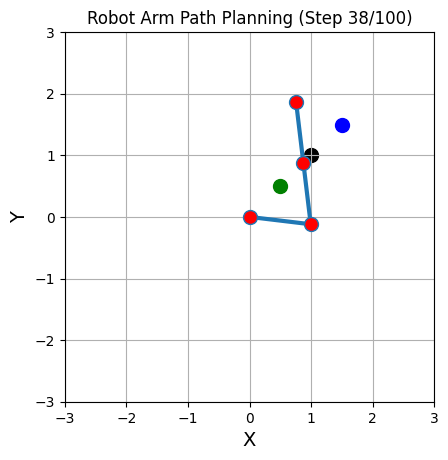

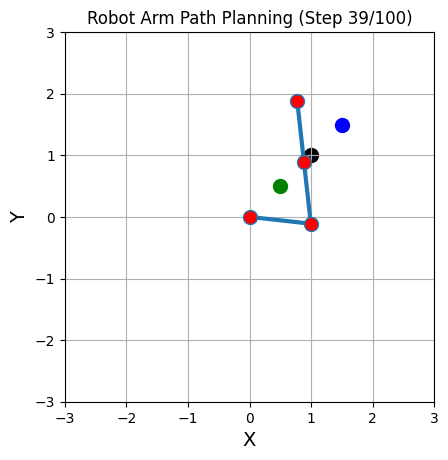

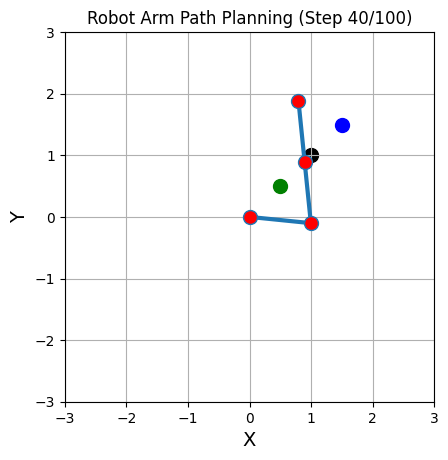

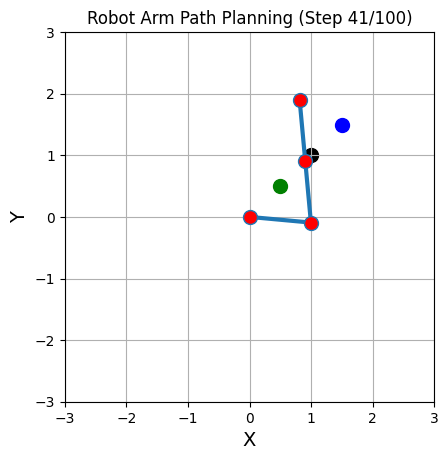

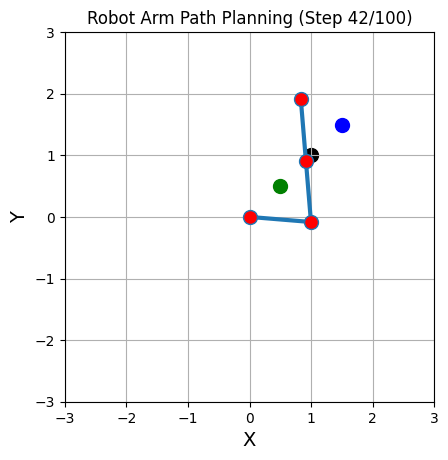

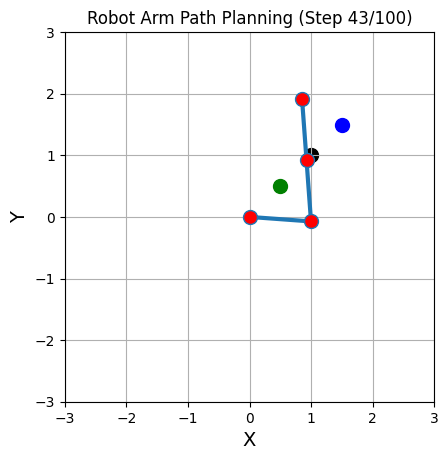

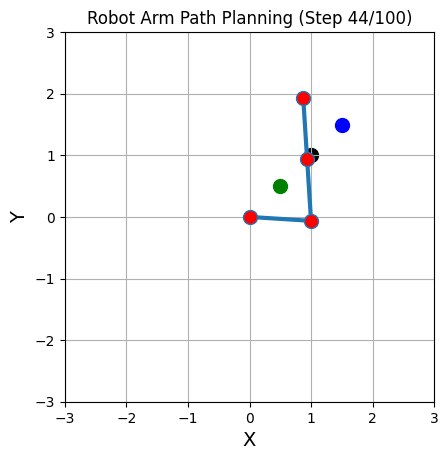

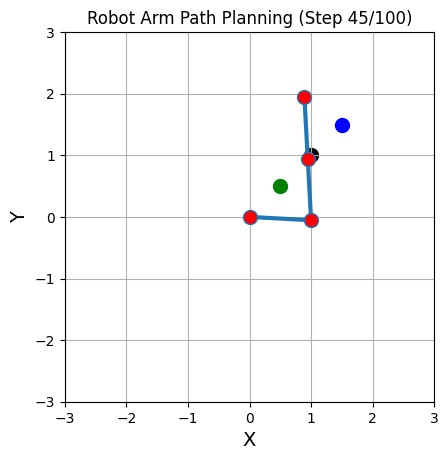

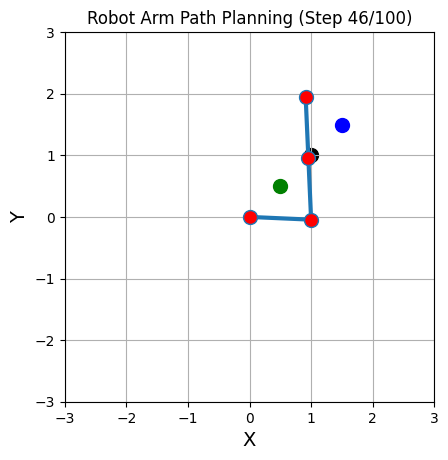

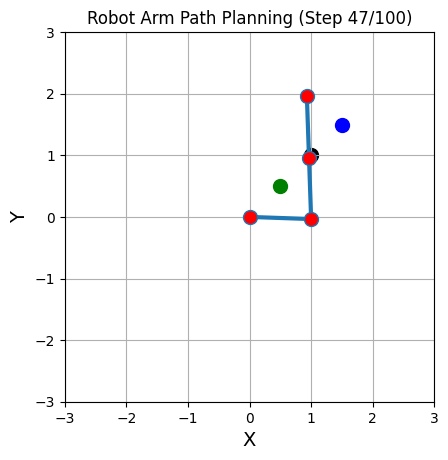

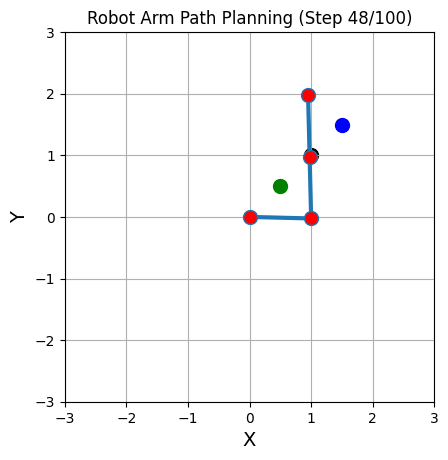

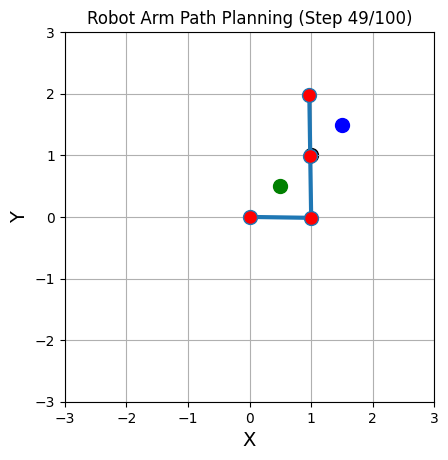

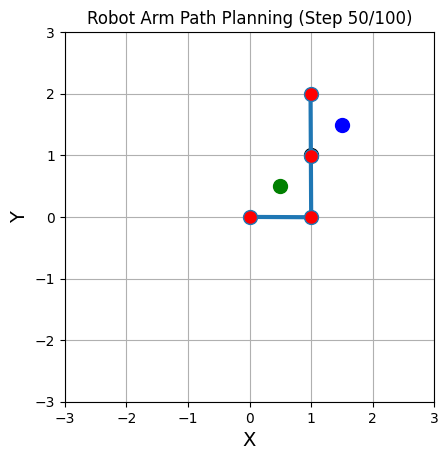

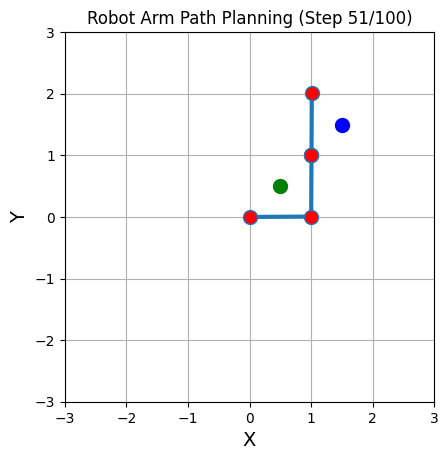

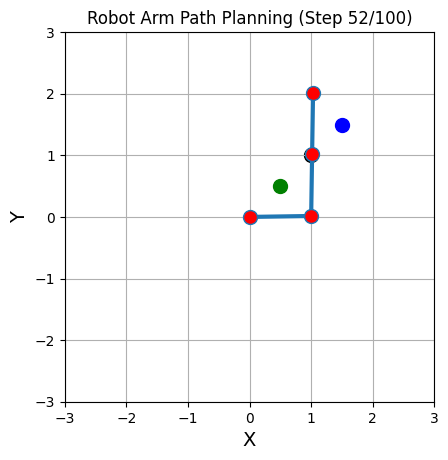

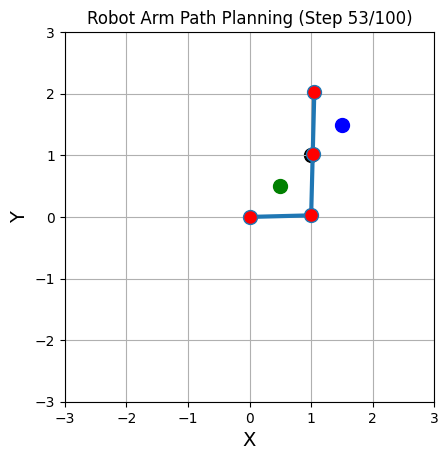

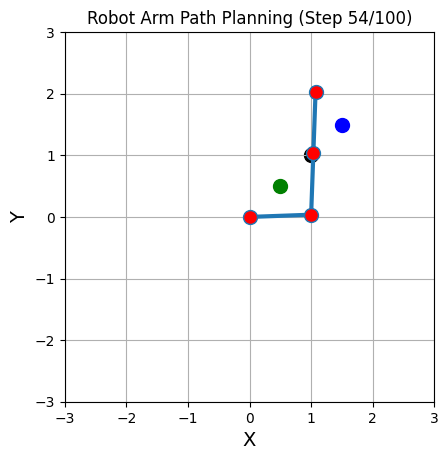

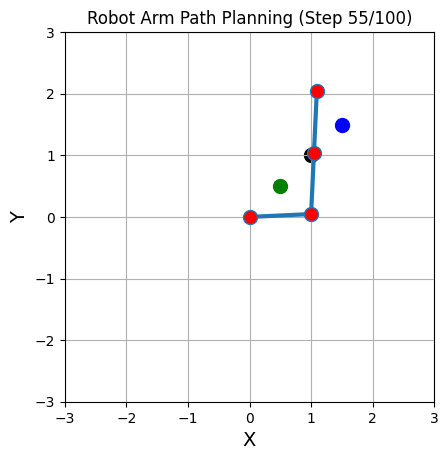

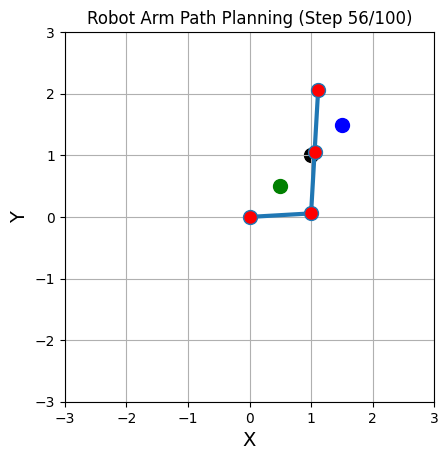

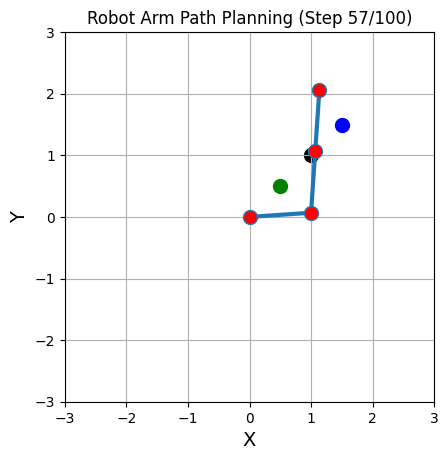

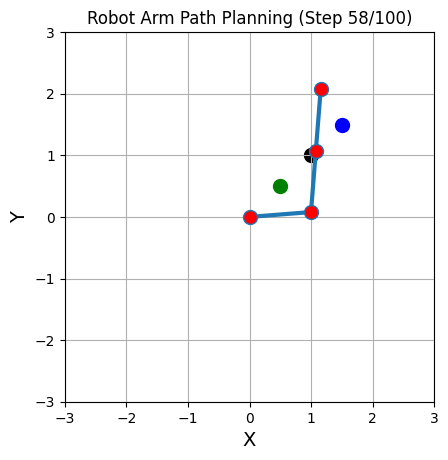

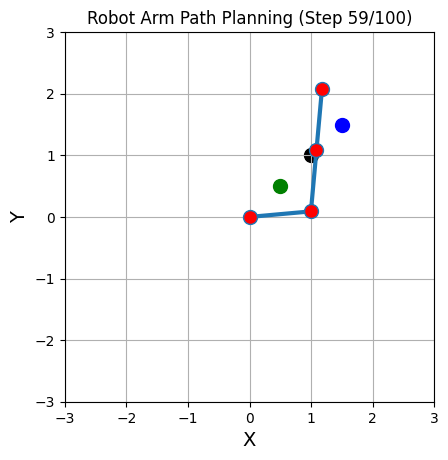

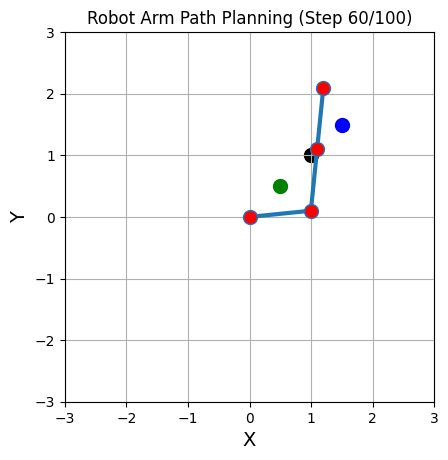

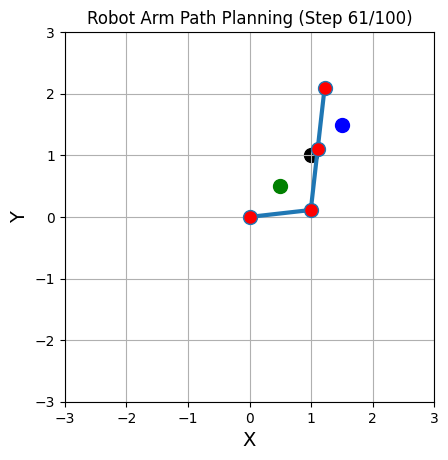

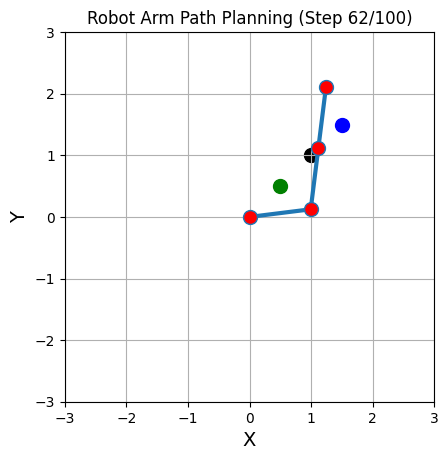

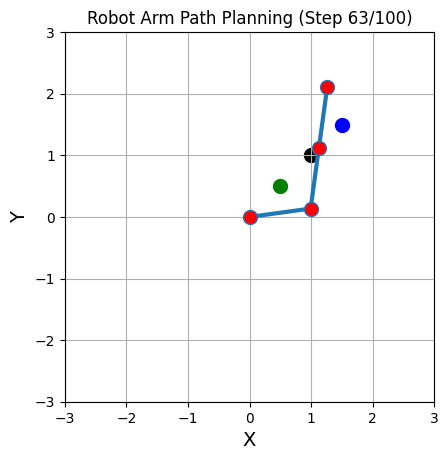

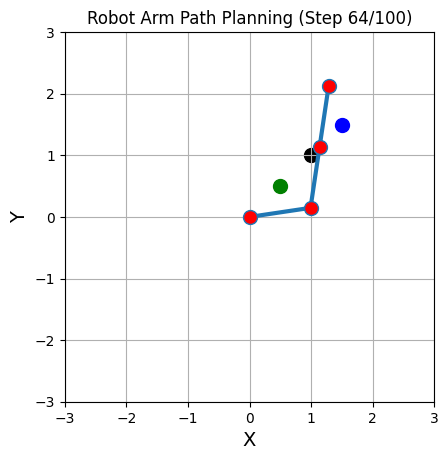

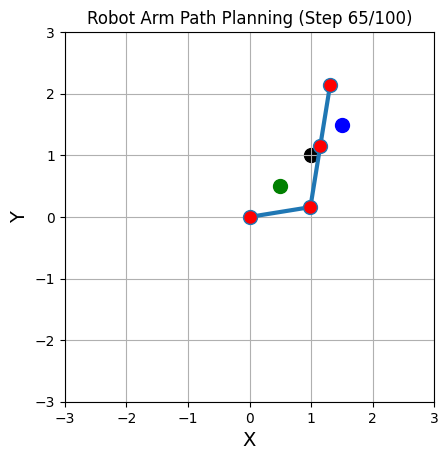

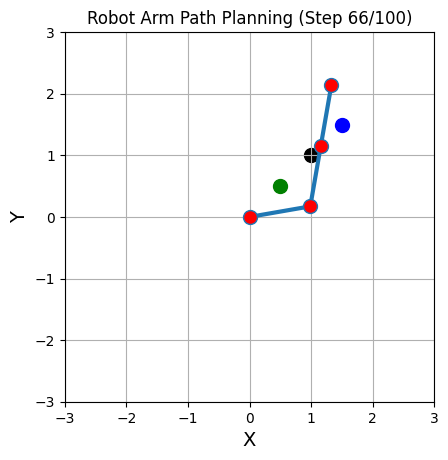

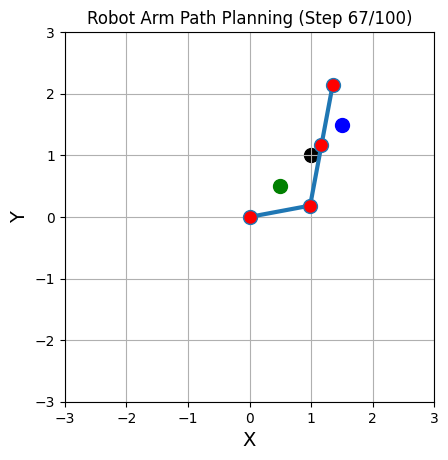

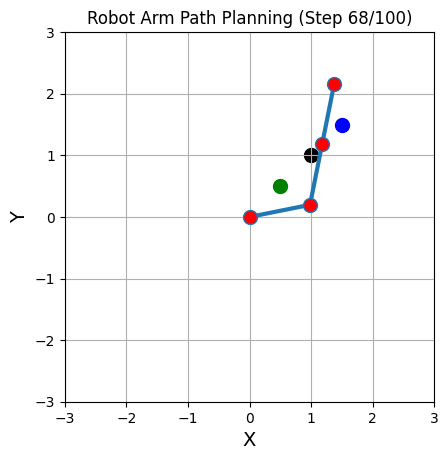

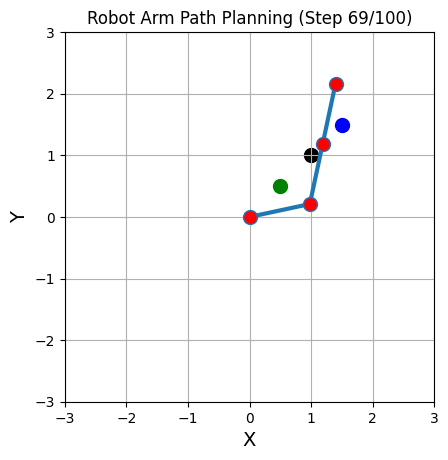

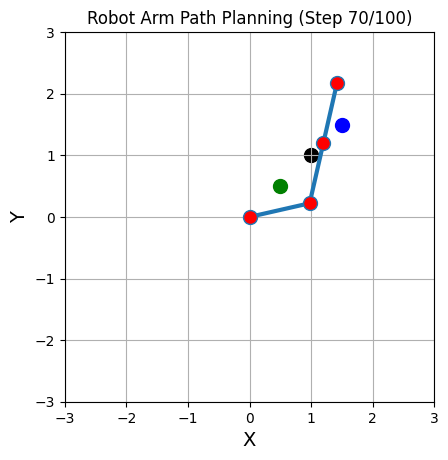

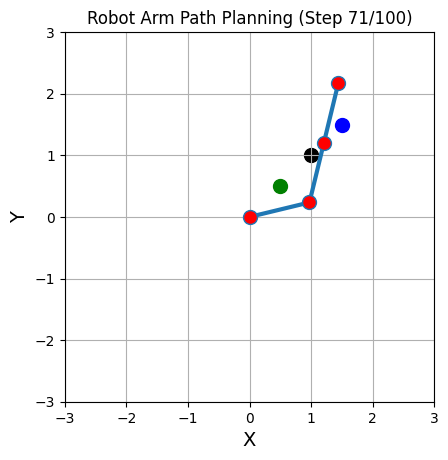

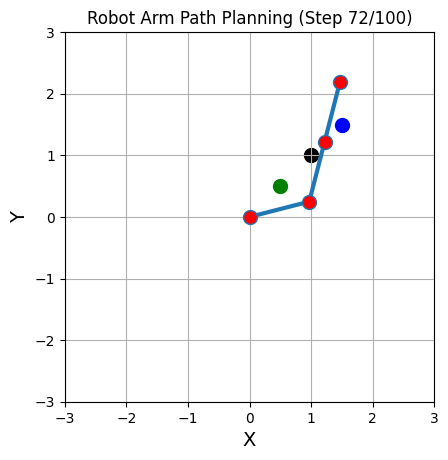

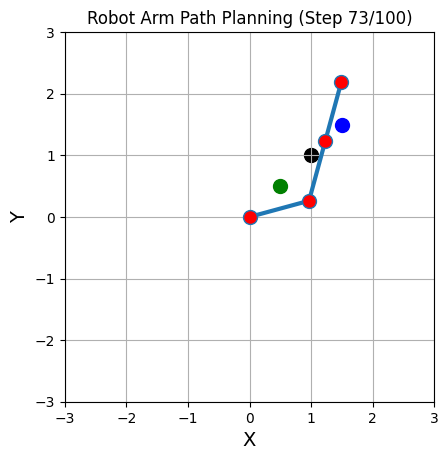

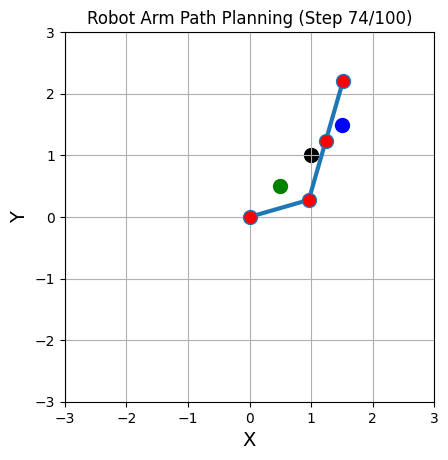

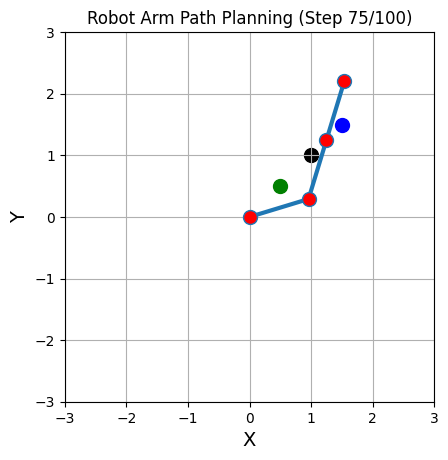

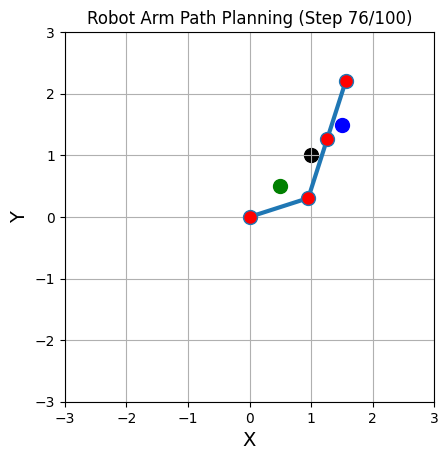

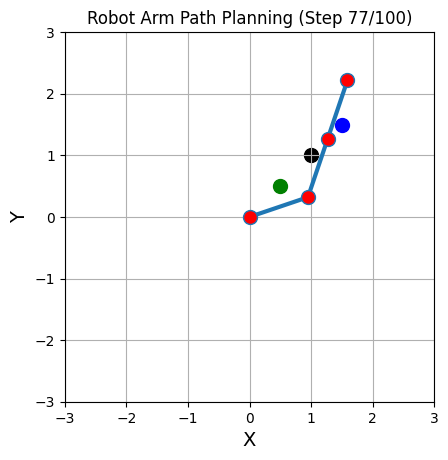

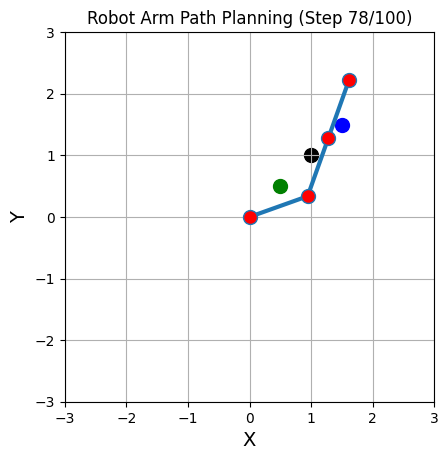

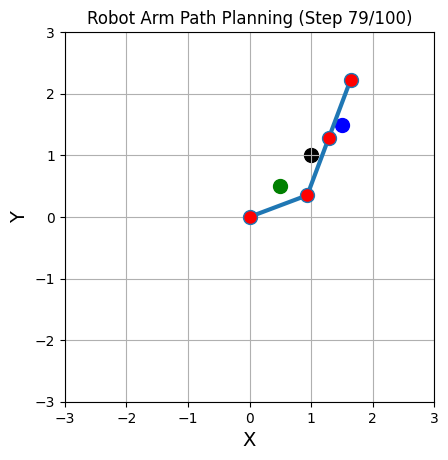

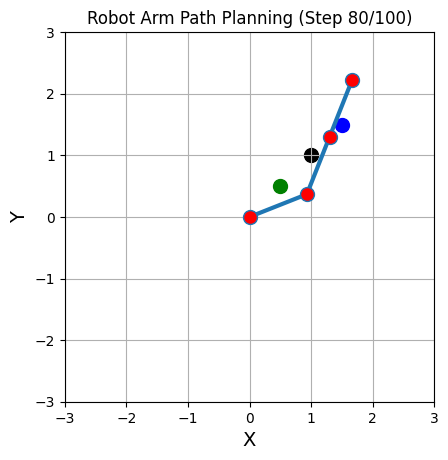

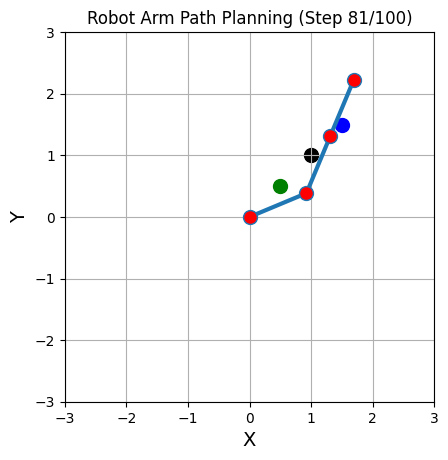

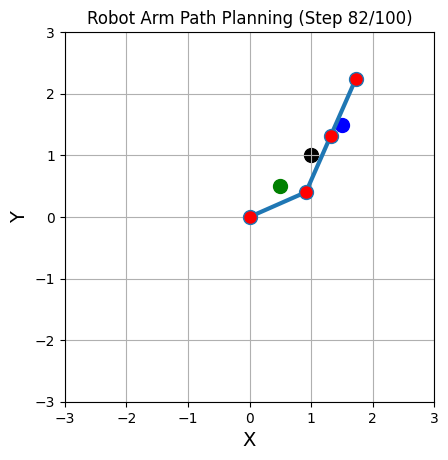

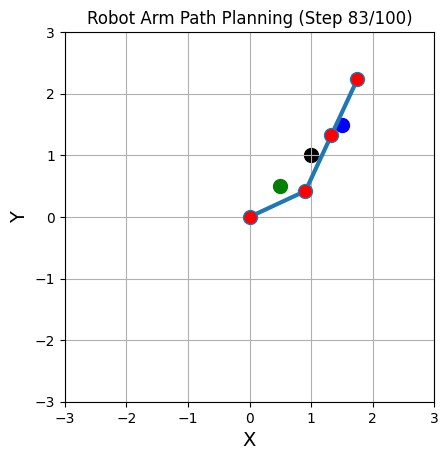

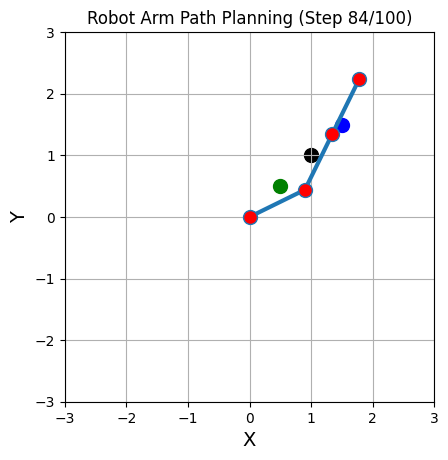

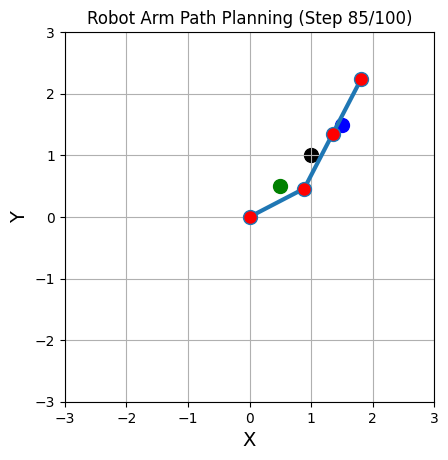

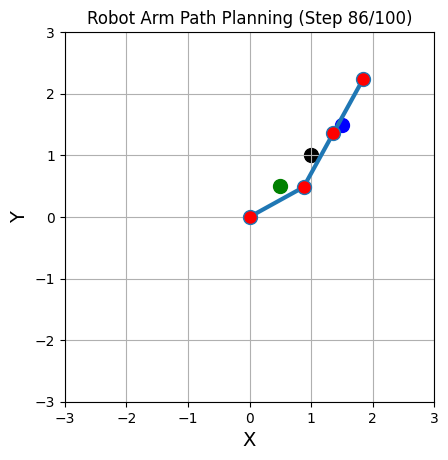

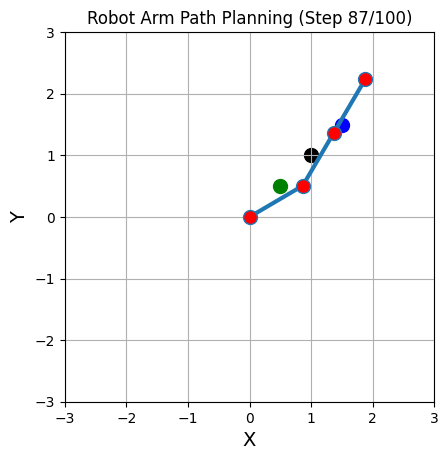

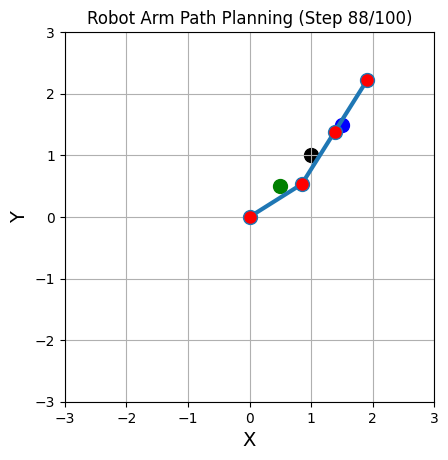

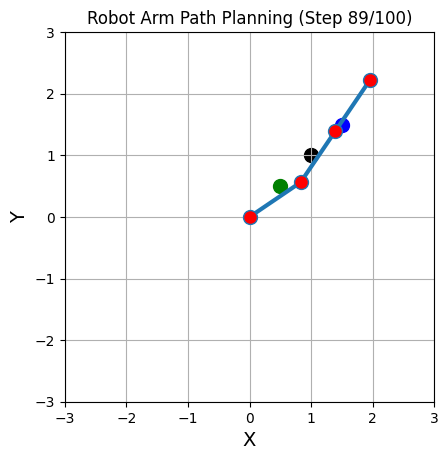

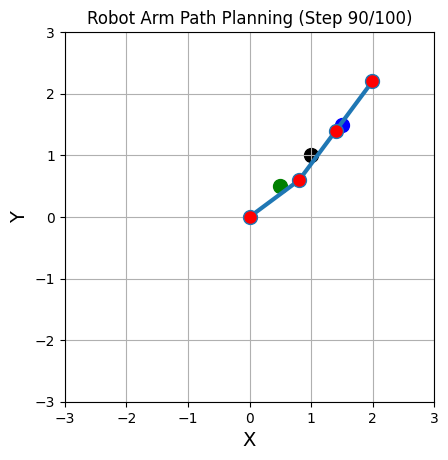

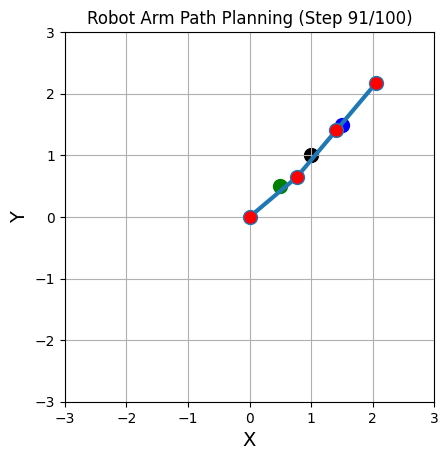

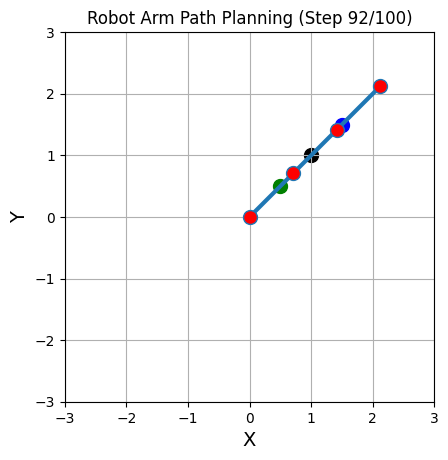

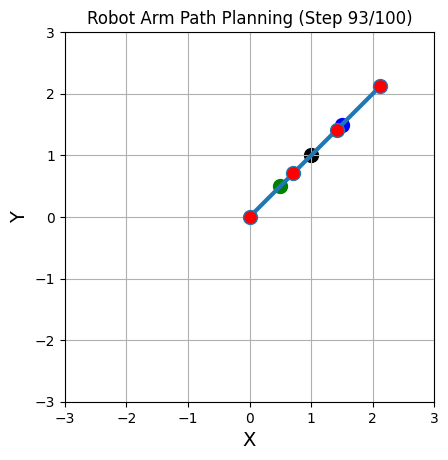

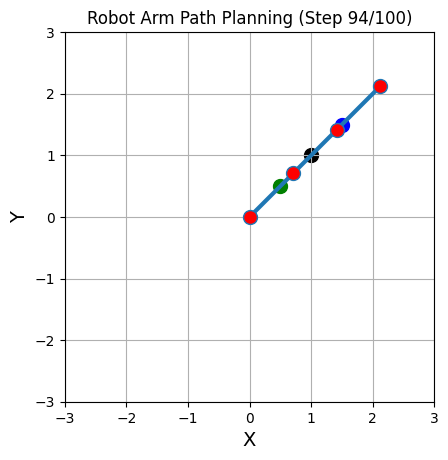

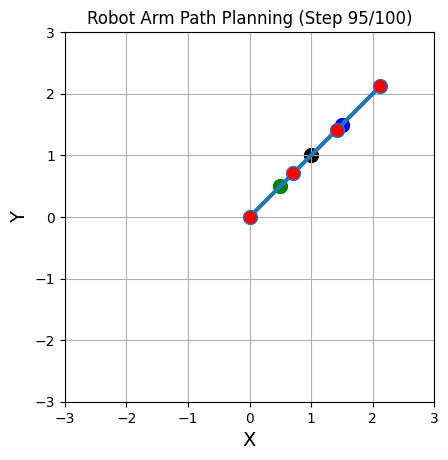

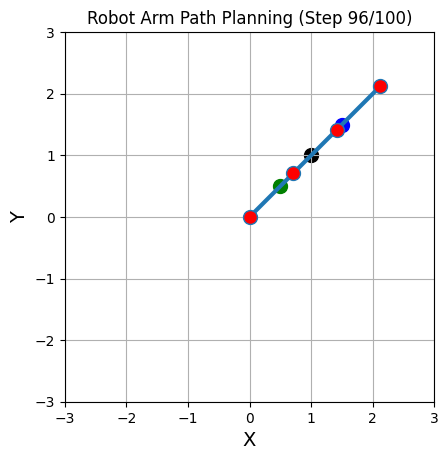

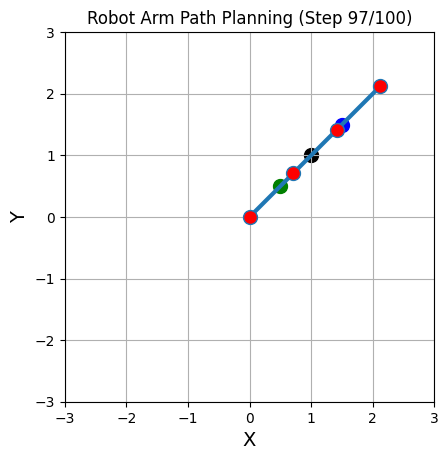

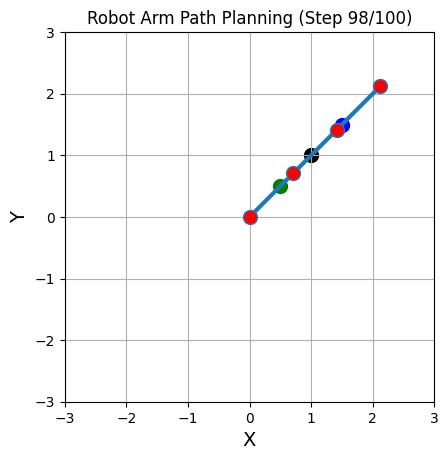

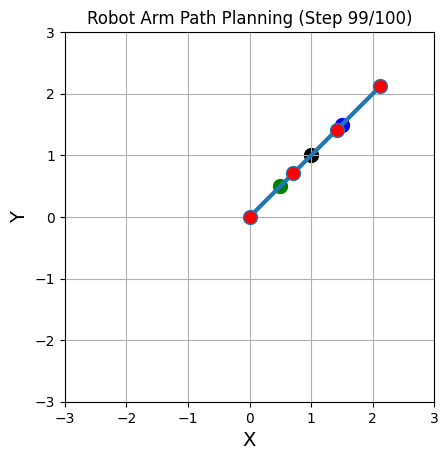

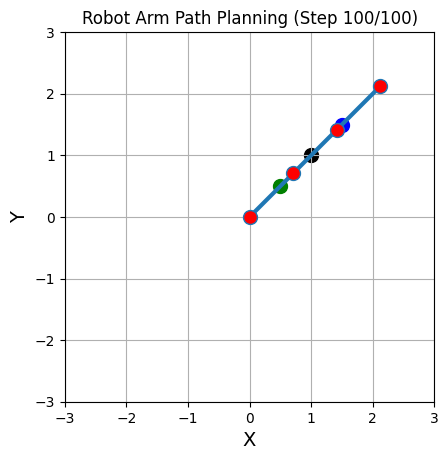

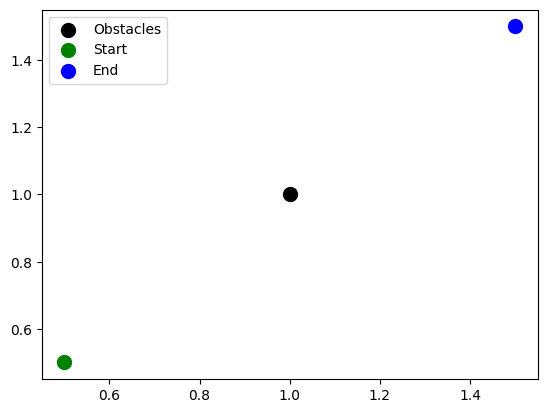

In [59]:
# Define lengths and obstacles
L1, L2, L3 = 1.0, 1.0, 1.0
start = (0.5, 0.5)
end = (1.5, 1.5)
obstacles = [(1.0, 1.0)]

simulate_robot_movement_with_obstacles(L1, L2, L3, start, end, obstacles)